In [2]:
import pandas
pandas.__version__

'0.25.1'

In [3]:
!head data/RollingSystemDemand_20180901_0129.csv

HDR,ROLLING SYSTEM DEMAND
VD,20180601000000,25152
VD,20180601000500,25231
VD,20180601001000,25070
VD,20180601001500,25019
VD,20180601002000,24943
VD,20180601002500,24727
VD,20180601003000,24716
VD,20180601003500,24815
VD,20180601004000,24877


The "VD" entry is being used as an index because the header has two columns

Tell Pandas to not use the first column as the index

`skipfooter`: Number of lines at bottom of file to skip (Unsupported with engine=’c’)

In [4]:
dframe = pandas.read_csv("data/RollingSystemDemand_20180901_0129.csv",
                         index_col=False,
                         skiprows=1,
                         skipfooter=1, engine='python',
                         header=None)
dframe.head()

,0,1,2
0,VD,20180601000000,25152
1,VD,20180601000500,25231
2,VD,20180601001000,25070
3,VD,20180601001500,25019
4,VD,20180601002000,24943


Now we can set the column labels

In [5]:
dframe.columns=['VD','time of measurement','value']
dframe.head()

,VD,time of measurement,value
0,VD,20180601000000,25152
1,VD,20180601000500,25231
2,VD,20180601001000,25070
3,VD,20180601001500,25019
4,VD,20180601002000,24943


In [6]:
dframe.tail()

,VD,time of measurement,value
1995,VD,20180607221500,26900
1996,VD,20180607222000,26618
1997,VD,20180607222500,26332
1998,VD,20180607223000,26038
1999,VD,20180607223500,25798


Let's check on the status of the data types in each column

In [7]:
dframe.dtypes

VD                     object
time of measurement     int64
value                   int64
dtype: object

In [8]:
dframe['time of measurement']=pandas.to_datetime(dframe['time of measurement'].astype(str),format='%Y%m%d%H%M%S')
dframe.head()

,VD,time of measurement,value
0,VD,2018-06-01 00:00:00,25152
1,VD,2018-06-01 00:05:00,25231
2,VD,2018-06-01 00:10:00,25070
3,VD,2018-06-01 00:15:00,25019
4,VD,2018-06-01 00:20:00,24943


In [9]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.1.1'

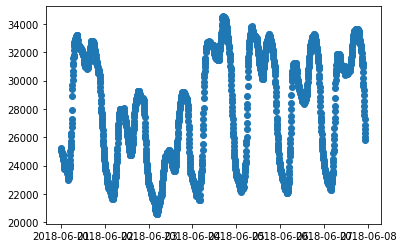

In [11]:
plt.plot_date(dframe['time of measurement'], dframe['value'])
plt.show()

Almost good, but the labels overlap

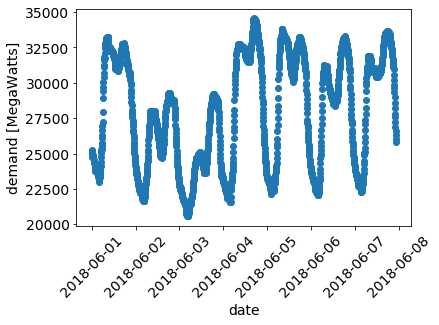

In [13]:
plt.plot_date(dframe['time of measurement'], dframe['value'])
plt.xticks(rotation=45)
plt.tick_params(labelsize=14)
plt.xlabel('date',fontsize=14)
plt.ylabel('demand [MegaWatts]',fontsize=14)
plt.show()

Can we explain these peaks?